<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Python/Clustering/HClust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import AgglomerativeClustering

# EDA

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.rename(columns={ col: col.lower() for col in titanic.columns}, inplace = True )
titanic.dropna(inplace=True)

In [ ]:
# masks for sex columns
# veriables should be numeric
titanic.sex.mask(titanic.sex == 'female', '1', inplace=True)
titanic.sex.mask(titanic.sex == 'male', '0', inplace=True)
titanic.sex = titanic.sex.astype('int')

In [ ]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [ ]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex              int64
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [ ]:
titanic.describe()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.480874,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
#Removing string features 
dataset = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare
1,1,1,1,38.0,1,0,71.2833
3,1,1,1,35.0,1,0,53.1000
6,0,1,0,54.0,0,0,51.8625
10,1,3,1,4.0,1,1,16.7000
11,1,1,1,58.0,0,0,26.5500


## Scaling data
2 different ways:

In [18]:
# z = ((x-u) / s)
dataset_scaled = scale(dataset)
dataset_scaled[:4]

array([[ 0.6984303 , -0.37225618,  1.03901177,  0.14906507,  0.83362754,
        -0.63172982, -0.0971798 ],
       [ 0.6984303 , -0.37225618,  1.03901177, -0.0432295 ,  0.83362754,
        -0.63172982, -0.3359971 ],
       [-1.43178211, -0.37225618, -0.96245301,  1.17463611, -0.7230443 ,
        -0.63172982, -0.35225028],
       [ 0.6984303 ,  3.52047984,  1.03901177, -2.03027338,  0.83362754,
         0.69708118, -0.81407038]])

In [22]:
# It's like StandardScaler but parameterized
ss = StandardScaler(with_mean=True,with_std=True)
dataset_scaled = ss.fit_transform(dataset)
dataset_scaled[:4]

array([[ 0.6984303 , -0.37225618,  1.03901177,  0.14906507,  0.83362754,
        -0.63172982, -0.0971798 ],
       [ 0.6984303 , -0.37225618,  1.03901177, -0.0432295 ,  0.83362754,
        -0.63172982, -0.3359971 ],
       [-1.43178211, -0.37225618, -0.96245301,  1.17463611, -0.7230443 ,
        -0.63172982, -0.35225028],
       [ 0.6984303 ,  3.52047984,  1.03901177, -2.03027338,  0.83362754,
         0.69708118, -0.81407038]])

In [23]:
dataset_scaled.shape

(183, 7)

## Training

### HClus


* Single linkage

In [26]:
# Zero distance and None n_clusters ensure all tree creation
ac = AgglomerativeClustering(n_clusters=None, linkage='single',distance_threshold=0)

In [29]:
m1 = ac.fit(dataset_scaled)

In [30]:
m1.labels_[:5]

array([133, 154, 116,  95, 161])

In [32]:
# How many clusters
m1.n_clusters_

183

### Dendogram

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
def plot_dendogram(model, **kwargs):
  # Create linkage matrix and then plot a dendogram

  #create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 #leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  # Plot dendogram
  dendrogram(linkage_matrix, **kwargs)  


    

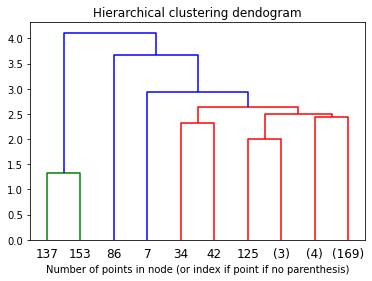

In [53]:
plt.title('Hierarchical clustering dendogram')
#p is for indicating only plot top p groups
plot_dendogram(m1, truncate_mode ='level', p=5)
plt.xlabel('Number of points in node (or index if point if no parenthesis)')
plt.show()